In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

Using TensorFlow backend.


In [5]:
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, MaxPooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score


In [6]:
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
import sys
import warnings

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import glob
import cv2
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import applications
from keras import backend as K
from sklearn.metrics import confusion_matrix
import random

from matplotlib import pyplot as plt

In [8]:

mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","label"])

In [9]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [10]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['p']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


In [11]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
train_labels['p']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


# $~Statistics Of Data$ 
Bar Plots For Mura variants between its count between classes and Body Parts , the Body parts , Studies of Patients and their  Classes


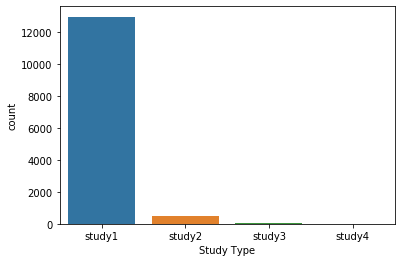

In [12]:
sns.countplot(data=train_labels,x='Study Type')

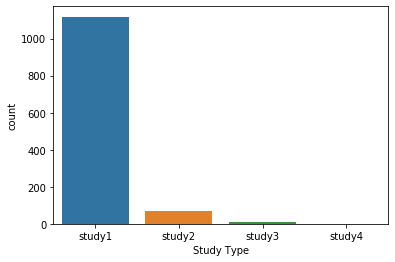

In [13]:
sns.countplot(data=test_labels,x='Study Type')

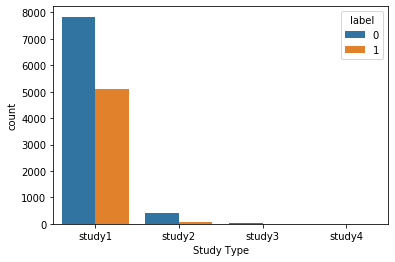

In [14]:
sns.countplot(data=train_labels,x='Study Type',hue='label')

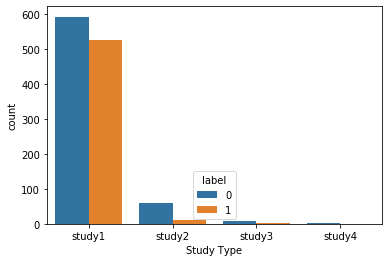

In [15]:
sns.countplot(data=test_labels,x='Study Type',hue='label')

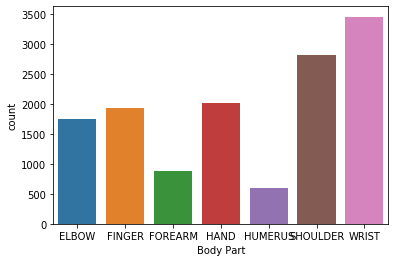

In [16]:
sns.countplot(data=train_labels,x='Body Part')

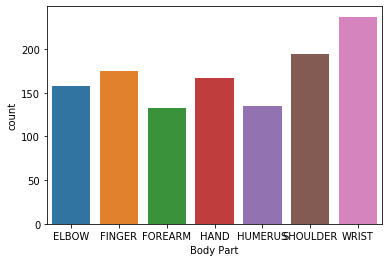

In [17]:
sns.countplot(data=test_labels,x='Body Part')

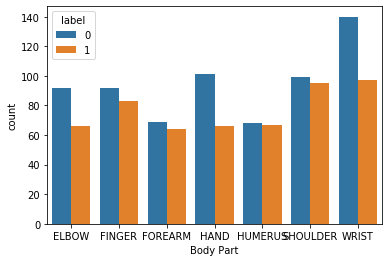

In [18]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='label')

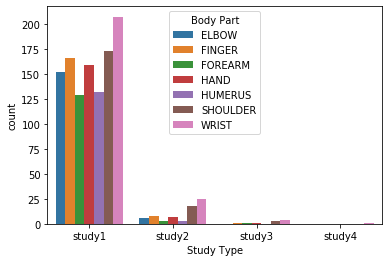

In [19]:
sns.countplot(data=test_labels,x='Study Type',hue='Body Part')

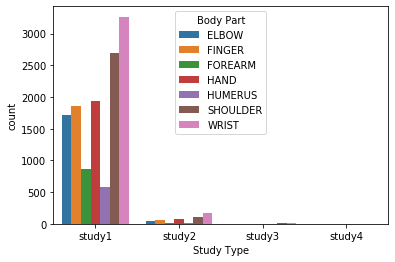

In [20]:
sns.countplot(data=train_labels,x='Study Type',hue='Body Part')

In [21]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [22]:
import matplotlib.pyplot as plt


In [23]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch

In [24]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_.iloc[e]['label']
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels

In [25]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.grid(False)

        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

    plt.show()

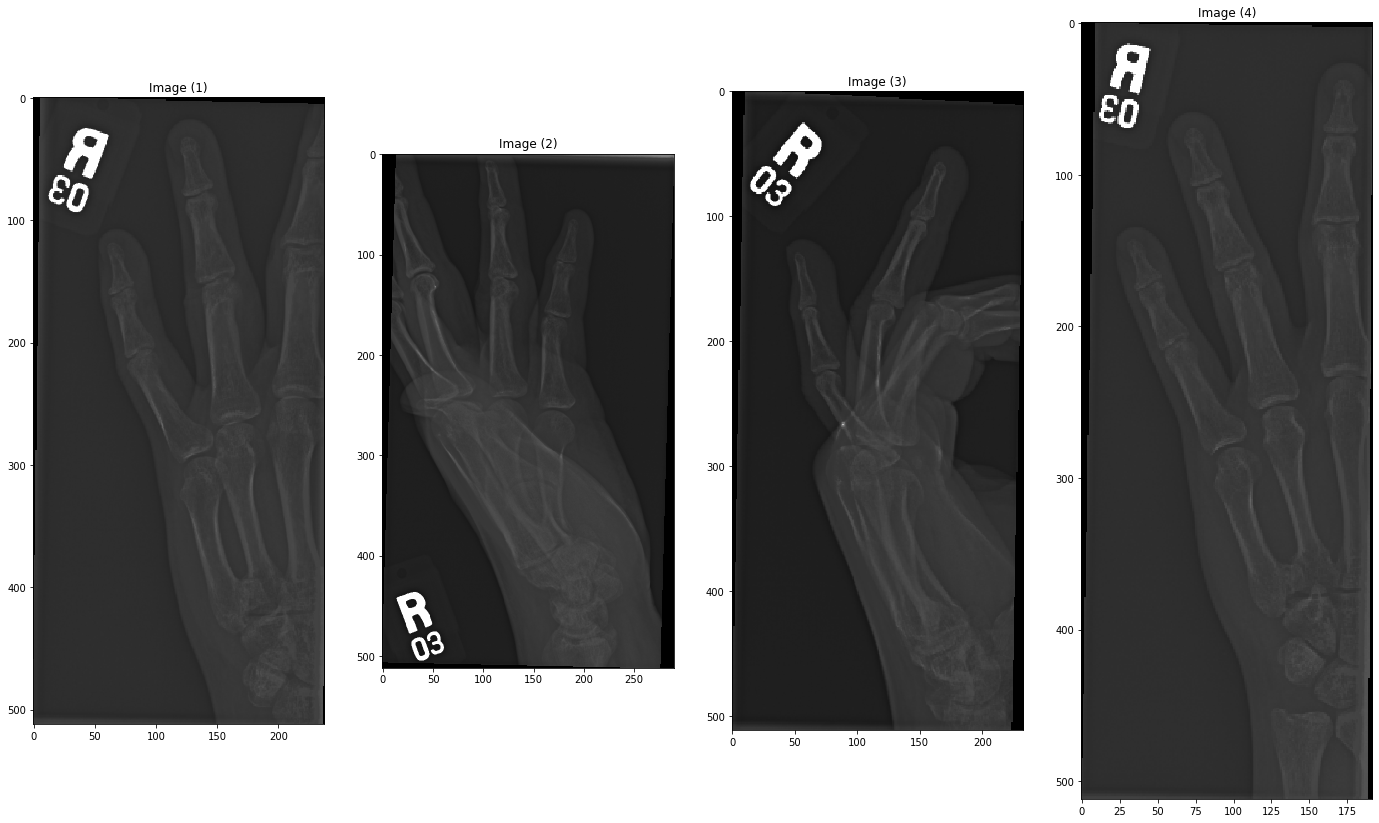

In [26]:

l=train_labels.iloc[2054]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

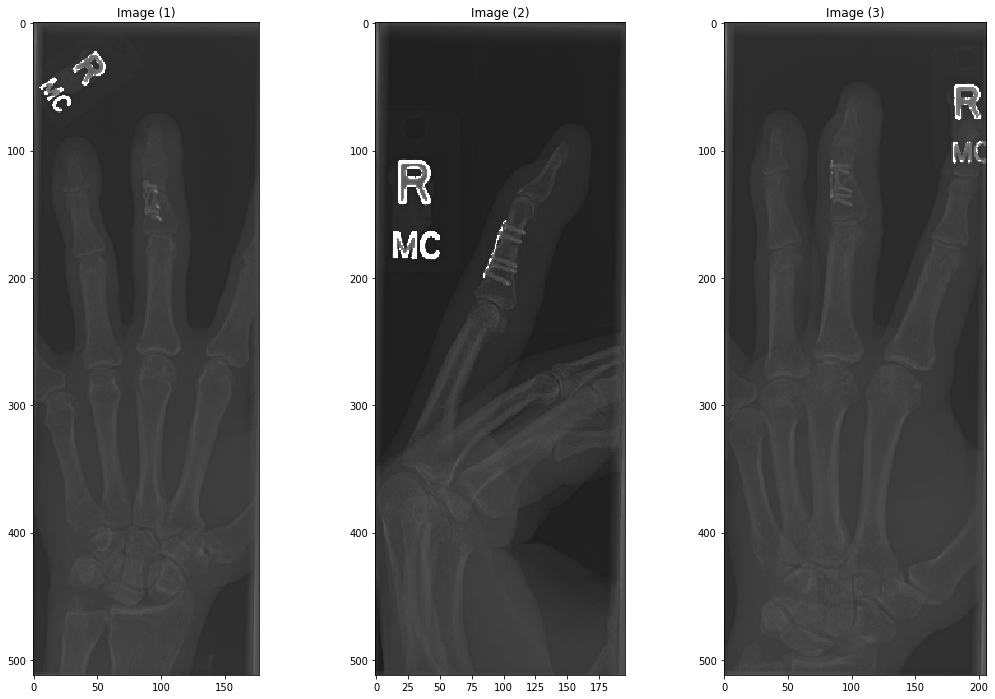

In [27]:
l=train_labels.iloc[2093]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

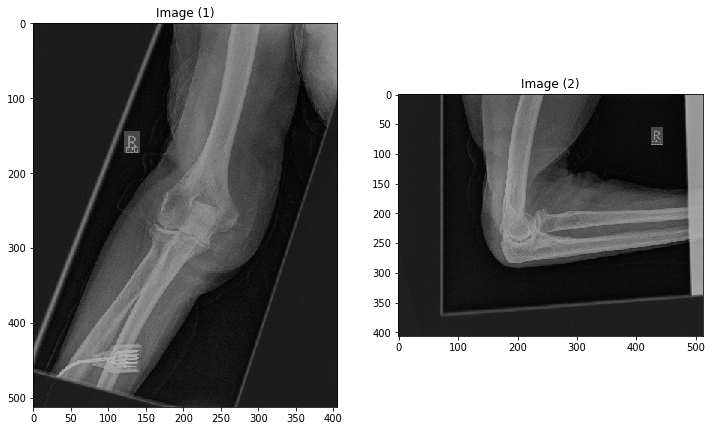

In [28]:
l=train_labels.iloc[3]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

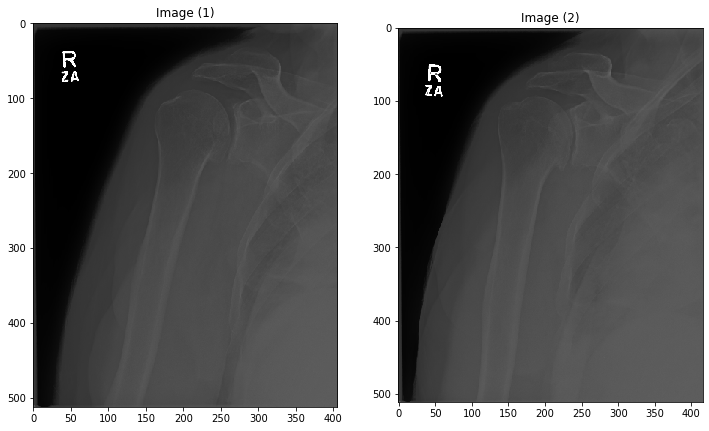

In [29]:
l=train_labels.iloc[7899]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
%matplotlib inline
plt.style.use("seaborn")


In [31]:
def prepareDataMobile(className):
    reszizing_Dim=(80,80)
    train_= train_labels[train_labels['Body Part'] ==className]
    test_ = test_labels[test_labels['Body Part'] ==className]
    data__Test=stretching_Data(test_,reszizing_Dim)
    labels_Test=stretching_Labels(test_)
    data__Train=stretching_Data(train_,reszizing_Dim)
    labels_Train=stretching_Labels(train_)
    data__Test=np.asarray(data__Test)
    labels_Test=np.asarray(labels_Test)
    data__Train=np.asarray(data__Train)
    labels_Train=np.asarray(labels_Train)

    return data__Train,labels_Train,data__Test,labels_Test

In [69]:
from keras import regularizers

def mobileNet_Model(data__Train,labels_Train,data__Test,labels_Test):
    if not sys.warnoptions:
        warnings.simplefilter("ignore")
    base_model = MobileNet(include_top=False,weights='imagenet', input_shape=data__Train.shape[1:])
    base_model.trainable = False
    x=base_model.output
    x=keras.layers.MaxPooling2D()(x)
    x=Flatten()(x)
    x=Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    x=Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    preds=Dense(1, activation='sigmoid')(x)
    

    model=Model(inputs=base_model.input,outputs=preds)
    for layer in model.layers[:86]:
        layer.trainable=False
    for layer in model.layers[86:]:
        layer.trainable=True

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(data__Train, labels_Train, epochs=20, batch_size=32,  validation_data=(data__Test, labels_Test))
    return history, model

In [70]:
def plotingModel(history_):

    plt.plot(history_.history['loss'])
    plt.plot(history_.history['val_loss'])
    plt.title("Train vs Validation Loss")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid(False)

    plt.legend(['train', 'test'], loc='upper right')

In [71]:
def kappaC(tn,fp,fn,tp):
    total_n=tn+fp+fn+tp
    P_totalAgree=(tn+tp)/total_n
    acctual_no=tn+fp
    acctual_yes=fn+tp
    predicted_no=tn+fn
    predicted_yes=fp+tp
    P__no=(acctual_no/total_n)*(predicted_no/total_n)    
    P__yes=(acctual_yes/total_n)*(predicted_yes/total_n)
    Pchance=P__no+P__yes
    theKappa=(P_totalAgree-Pchance)/(1-Pchance)
    return theKappa

In [72]:
def plotResults(data__Test,labels_Test,_model):
    test_loss, test_acc = _model.evaluate(data__Test, labels_Test, batch_size=100)
    print("Loss on test set: ", test_loss)
    print("Accuracy on test set: ", test_acc)
    test_logits = _model.predict(data__Test, batch_size=10)
    cm  = confusion_matrix(labels_Test, np.round(test_logits))
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Abnromal'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Abnormal'], fontsize=16)
    plt.show()
    true_negative, false_positive, false_negative, true_positive  = cm.ravel()
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1=2*((precision*recall)/(precision+recall))
    kappa=kappaC(true_negative, false_positive, false_negative, true_positive)
    
    print('Precison of MURA for Abnormal:{:.2f}'.format(precision))
    print('Recall of MURA for Abnormal:{:.2f}'.format(recall))
    print('Fmeasure of MURA for Abnormal:{:.2f}'.format(f1))
    print('Kappa of MURA for Abnormal:{:.2f}'.format(kappa))
    num_test = 20
    predictions = _model.predict(data__Test[:num_test,:,:,:])
    for i in range(num_test):
        if predictions[i] <test_acc:
            print("Predicted: Abnormal ",predictions[i])
        else:
            print("predicted: Normal",predictions[i])
        plt.imshow(data__Test[i])
        plt.grid(False)

        plt.show()
    return test_acc,kappa
   

$Molbile Net$

Train on 1825 samples, validate on 301 samples
Epoch 1/20
1825/1825 [==============================] - 80s 44ms/step - loss: 6.2834 - acc: 0.5863 - val_loss: 5.4357 - val_acc: 0.5449
Epoch 2/20
1825/1825 [==============================] - 18s 10ms/step - loss: 4.9194 - acc: 0.6422 - val_loss: 4.3986 - val_acc: 0.5083
Epoch 3/20
1825/1825 [==============================] - 19s 10ms/step - loss: 3.9418 - acc: 0.6663 - val_loss: 3.5947 - val_acc: 0.5282
Epoch 4/20
1825/1825 [==============================] - 21s 12ms/step - loss: 3.1723 - acc: 0.6959 - val_loss: 3.0509 - val_acc: 0.4983
Epoch 5/20
1825/1825 [==============================] - 18s 10ms/step - loss: 2.5907 - acc: 0.7134 - val_loss: 2.6771 - val_acc: 0.4983
Epoch 6/20
1825/1825 [==============================] - 14s 8ms/step - loss: 2.1457 - acc: 0.7310 - val_loss: 2.1294 - val_acc: 0.5316
Epoch 7/20
1825/1825 [==============================] - 12s 6ms/step - loss: 1.8081 - acc: 0.7299 - val_loss: 1.9146 - val_acc: 0.4950
Epo

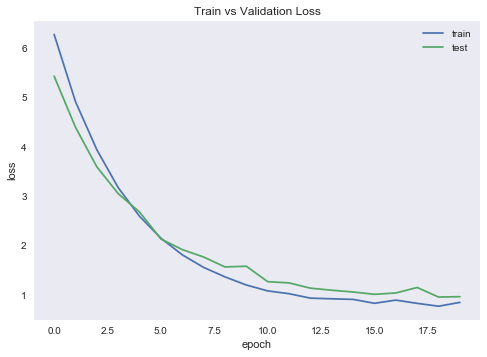

In [73]:
armClass='FOREARM'
dataArm__Train_mobile,labelsArm_Train_mobile,dataArm__Test_mobile,labelsArm_Test_mobile=prepareDataMobile(armClass)
historyMobile_arm, modelMobile_arm=mobileNet_Model(dataArm__Train_mobile,labelsArm_Train_mobile,dataArm__Test_mobile,labelsArm_Test_mobile)
plotingModel(historyMobile_arm)


301/301 [==============================] - 30s 98ms/step
Loss on test set:  0.9584760275790065
Accuracy on test set:  0.5016611295681063


<Figure size 576x396 with 0 Axes>

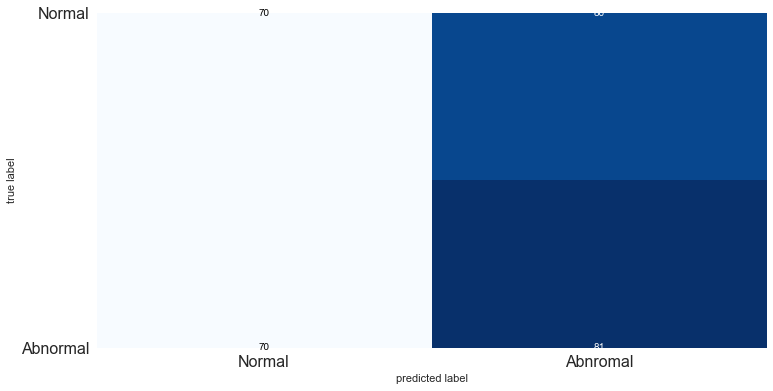

Precison of MURA for Abnormal:0.50
Recall of MURA for Abnormal:0.54
Fmeasure of MURA for Abnormal:0.52
Kappa of MURA for Abnormal:0.00
predicted: Normal [0.83427715]


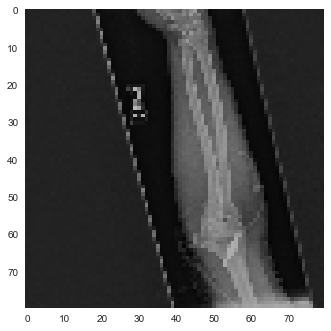

predicted: Normal [0.72668767]


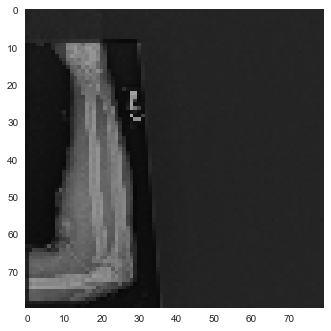

Predicted: Abnormal  [0.2587651]


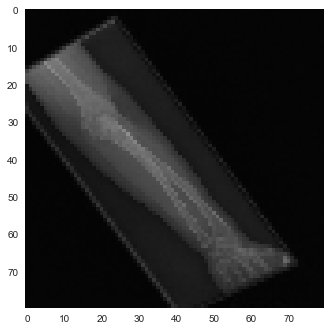

Predicted: Abnormal  [0.4514518]


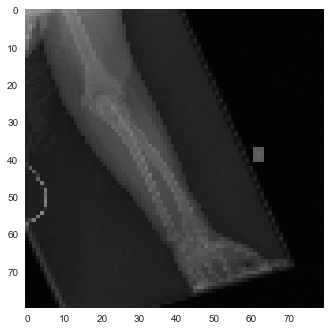

predicted: Normal [0.50963616]


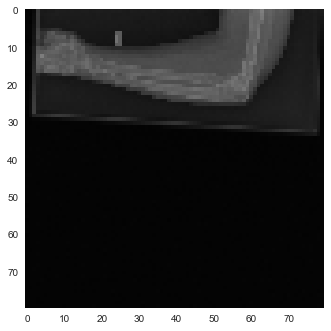

Predicted: Abnormal  [0.4224897]


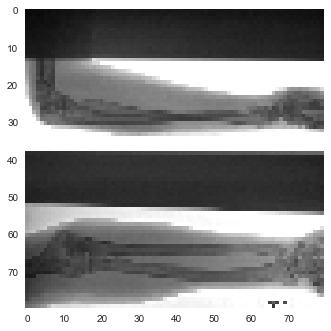

Predicted: Abnormal  [0.49086988]


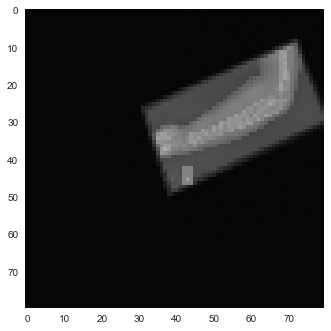

Predicted: Abnormal  [0.39493886]


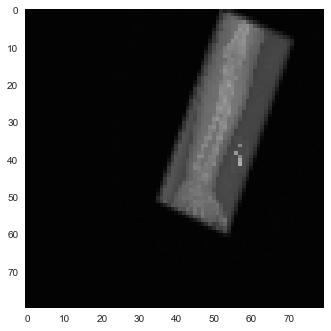

predicted: Normal [0.6087229]


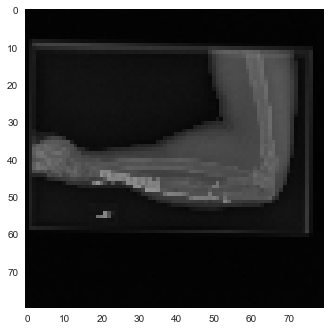

predicted: Normal [0.5133866]


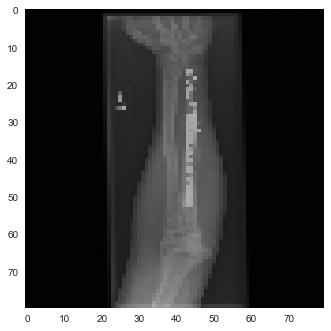

predicted: Normal [0.5312414]


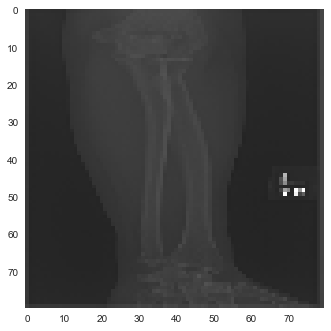

Predicted: Abnormal  [0.43174338]


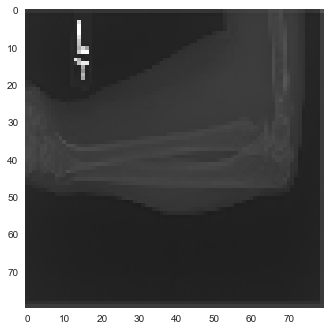

Predicted: Abnormal  [0.38539928]


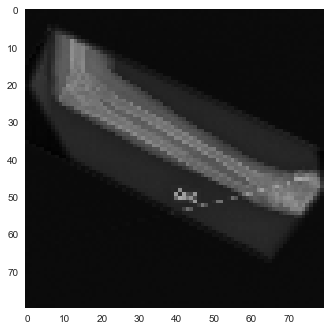

Predicted: Abnormal  [0.46053478]


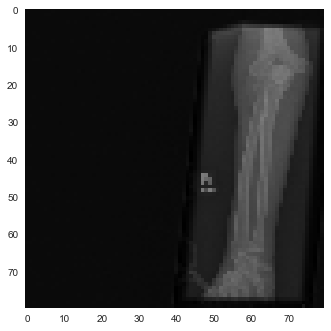

predicted: Normal [0.5917709]


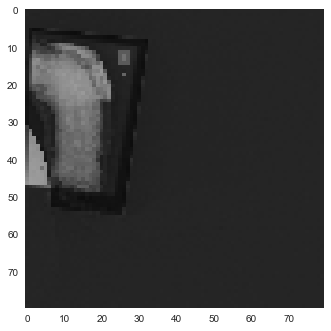

Predicted: Abnormal  [0.44172657]


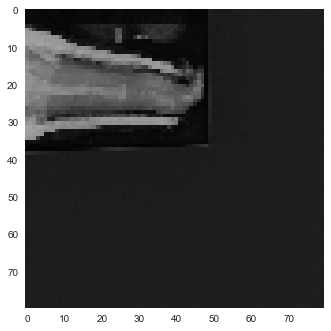

Predicted: Abnormal  [0.4104776]


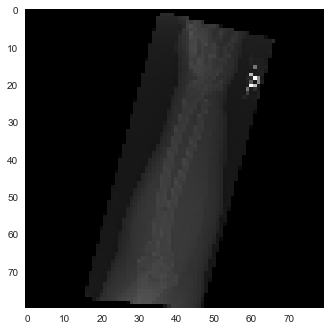

Predicted: Abnormal  [0.3869918]


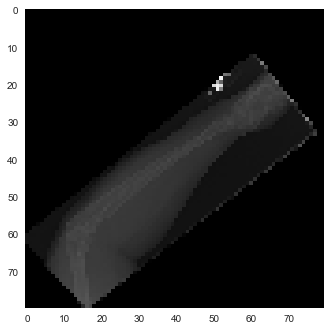

Predicted: Abnormal  [0.4258204]


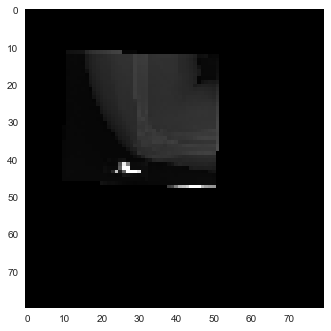

Predicted: Abnormal  [0.43695036]


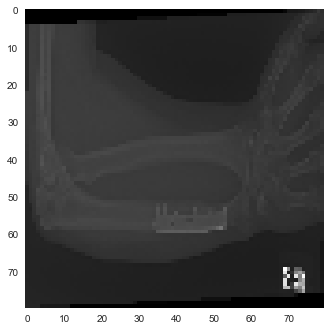

In [98]:
from mlxtend.plotting import plot_confusion_matrix

test_accArm_mob,kappa_arm_mobile=plotResults(dataArm__Test_mobile,labelsArm_Test_mobile,modelMobile_arm)

Train on 4931 samples, validate on 465 samples
Epoch 1/20
4931/4931 [==============================] - 47s 10ms/step - loss: 5.4092 - acc: 0.5603 - val_loss: 3.9799 - val_acc: 0.5161
Epoch 2/20
4931/4931 [==============================] - 33s 7ms/step - loss: 3.0869 - acc: 0.6143 - val_loss: 2.3770 - val_acc: 0.5290
Epoch 3/20
4931/4931 [==============================] - 30s 6ms/step - loss: 1.8864 - acc: 0.6417 - val_loss: 1.5647 - val_acc: 0.5376
Epoch 4/20
4931/4931 [==============================] - 31s 6ms/step - loss: 1.2968 - acc: 0.6500 - val_loss: 1.1943 - val_acc: 0.5484
Epoch 5/20
4931/4931 [==============================] - 29s 6ms/step - loss: 0.9974 - acc: 0.6759 - val_loss: 1.0233 - val_acc: 0.5032
Epoch 6/20
4931/4931 [==============================] - 29s 6ms/step - loss: 0.8480 - acc: 0.6664 - val_loss: 0.8914 - val_acc: 0.5226
Epoch 7/20
4931/4931 [==============================] - 31s 6ms/step - loss: 0.7685 - acc: 0.6838 - val_loss: 0.8446 - val_acc: 0.5269
Epoch 8

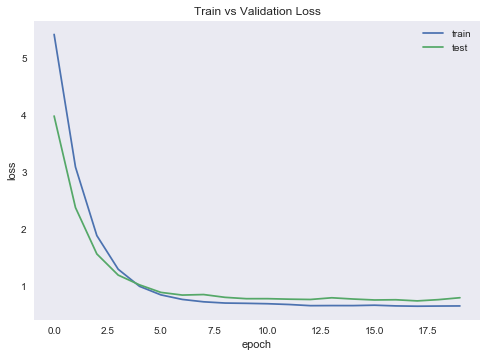

In [75]:
elbowClass='ELBOW'
dataElbow__Train_mobile,labelsElbow_Train_mobile,dataElbow__Test_mobile,labelsWlbow_Test_mobile=prepareDataMobile(elbowClass)
historyMobile_elbow, modelMobile_elbow=mobileNet_Model(dataElbow__Train_mobile,labelsElbow_Train_mobile,dataElbow__Test_mobile,labelsWlbow_Test_mobile)
plotingModel(historyMobile_elbow)


465/465 [==============================] - 10s 22ms/step
Loss on test set:  0.7982080396144621
Accuracy on test set:  0.5053763479314825


<Figure size 576x396 with 0 Axes>

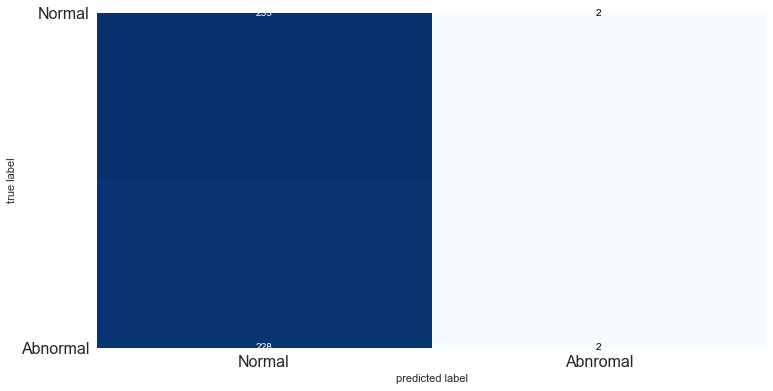

Precison of MURA for Abnormal:0.50
Recall of MURA for Abnormal:0.01
Fmeasure of MURA for Abnormal:0.02
Kappa of MURA for Abnormal:0.00
Predicted: Abnormal  [0.3898304]


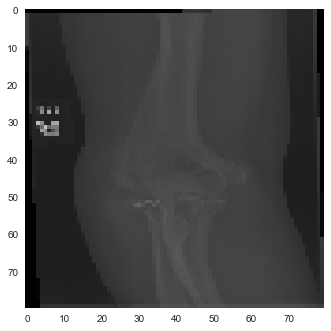

Predicted: Abnormal  [0.32592487]


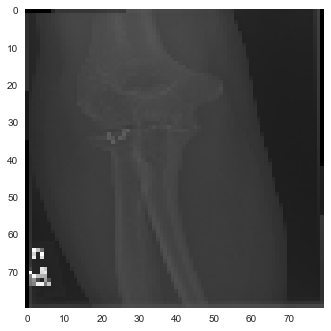

Predicted: Abnormal  [0.34880424]


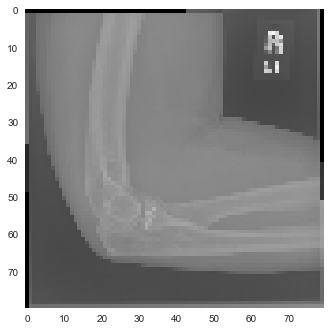

Predicted: Abnormal  [0.34562367]


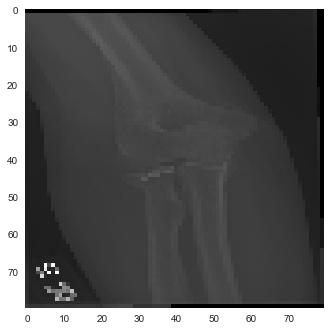

Predicted: Abnormal  [0.37717378]


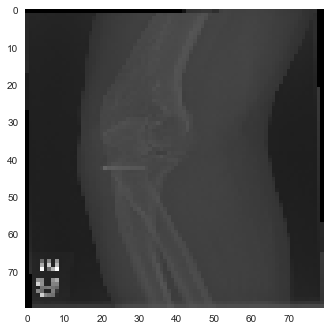

Predicted: Abnormal  [0.29979208]


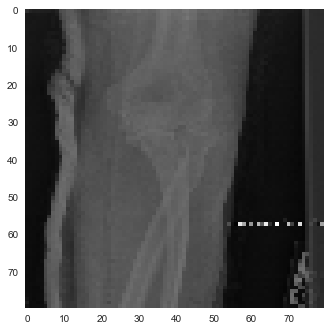

Predicted: Abnormal  [0.47883183]


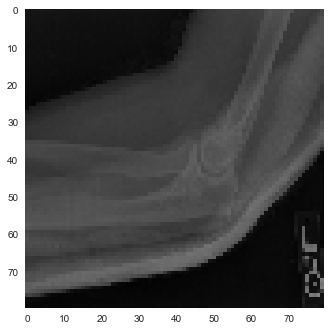

Predicted: Abnormal  [0.31885007]


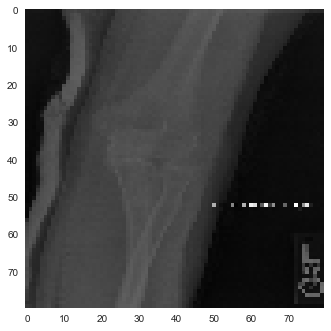

Predicted: Abnormal  [0.3133594]


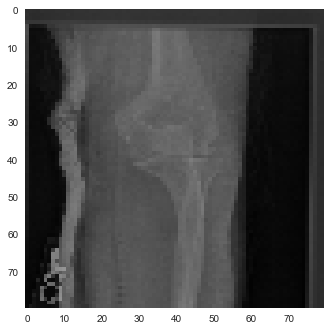

Predicted: Abnormal  [0.3425387]


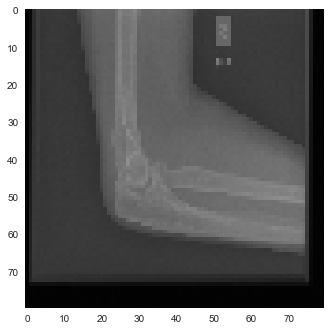

Predicted: Abnormal  [0.26953205]


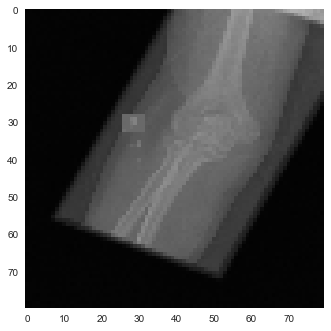

Predicted: Abnormal  [0.3357796]


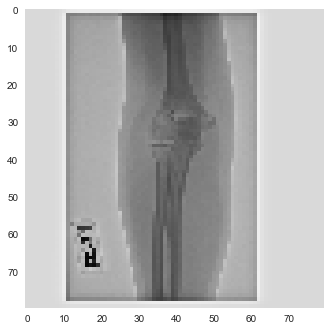

Predicted: Abnormal  [0.30749312]


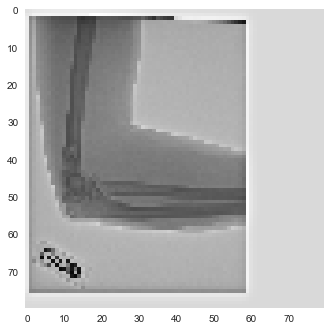

Predicted: Abnormal  [0.36562246]


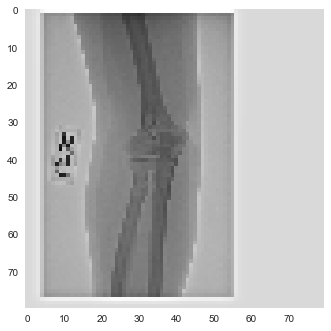

Predicted: Abnormal  [0.3603323]


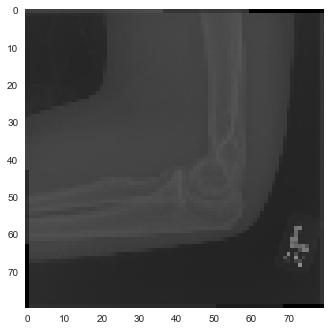

Predicted: Abnormal  [0.33374947]


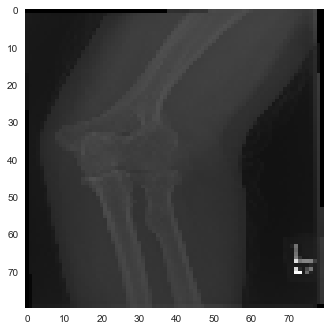

Predicted: Abnormal  [0.33205625]


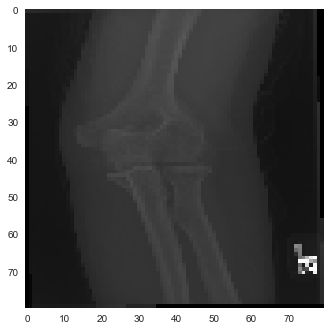

Predicted: Abnormal  [0.31352735]


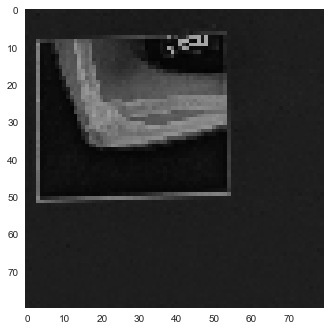

Predicted: Abnormal  [0.33578628]


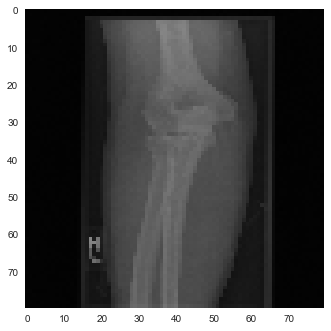

Predicted: Abnormal  [0.3528697]


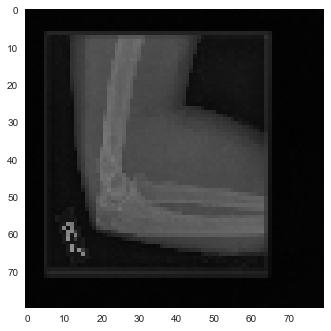

In [76]:
test_accElbow_mob,kappa_elbowMobile=plotResults(dataElbow__Test_mobile,labelsWlbow_Test_mobile,modelMobile_elbow)

Train on 5106 samples, validate on 461 samples
Epoch 1/20
5106/5106 [==============================] - 255s 50ms/step - loss: 5.2731 - acc: 0.6054 - val_loss: 4.4042 - val_acc: 0.4642
Epoch 2/20
5106/5106 [==============================] - 114s 22ms/step - loss: 2.9455 - acc: 0.6510 - val_loss: 3.0397 - val_acc: 0.4642
Epoch 3/20
5106/5106 [==============================] - 113s 22ms/step - loss: 1.7840 - acc: 0.6763 - val_loss: 2.2848 - val_acc: 0.4642
Epoch 4/20
5106/5106 [==============================] - 114s 22ms/step - loss: 1.2160 - acc: 0.6774 - val_loss: 1.9999 - val_acc: 0.4642
Epoch 5/20
5106/5106 [==============================] - 123s 24ms/step - loss: 0.9362 - acc: 0.6933 - val_loss: 1.4416 - val_acc: 0.4642
Epoch 6/20
5106/5106 [==============================] - 119s 23ms/step - loss: 0.8039 - acc: 0.6837 - val_loss: 1.7931 - val_acc: 0.4642
Epoch 7/20
5106/5106 [==============================] - 102s 20ms/step - loss: 0.7294 - acc: 0.6857 - val_loss: 1.5568 - val_acc: 0

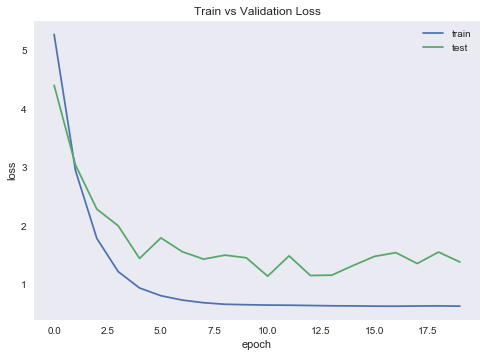

In [78]:
fingerClass='FINGER'
dataFinger__Train_mobile,labelsFinger_Train_mobile,dataFinger__Test_mobile,labelsFinger_Test_mobile=prepareDataMobile(fingerClass)
historyMobile_finger, modelMobile_finger=mobileNet_Model(dataFinger__Train_mobile,labelsFinger_Train_mobile,dataFinger__Test_mobile,labelsFinger_Test_mobile)
plotingModel(historyMobile_finger)


461/461 [==============================] - 34s 73ms/step
Loss on test set:  1.380464023694299
Accuracy on test set:  0.46420824644105296


<Figure size 576x396 with 0 Axes>

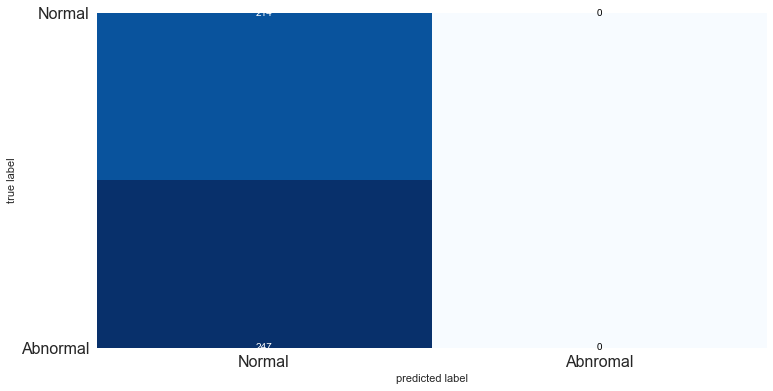

Precison of MURA for Abnormal:nan
Recall of MURA for Abnormal:0.00
Fmeasure of MURA for Abnormal:nan
Kappa of MURA for Abnormal:0.00
Predicted: Abnormal  [0.08437276]


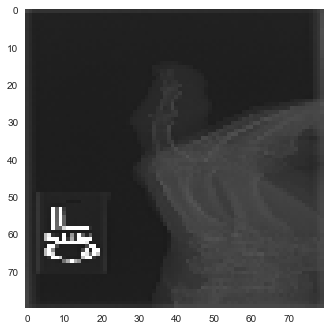

Predicted: Abnormal  [0.10508269]


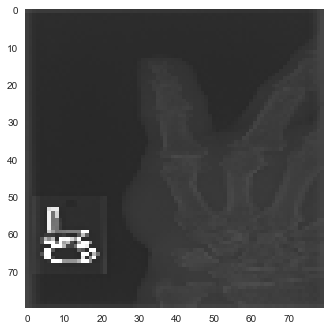

Predicted: Abnormal  [0.08278683]


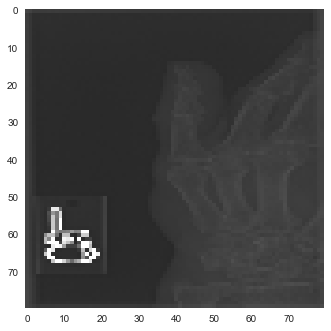

Predicted: Abnormal  [0.01864919]


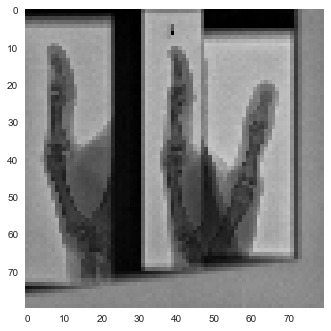

Predicted: Abnormal  [0.16735801]


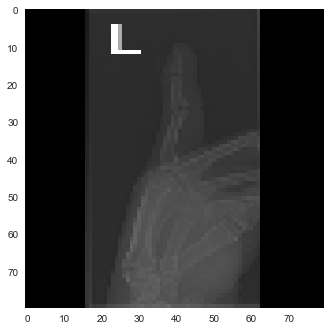

Predicted: Abnormal  [0.10778171]


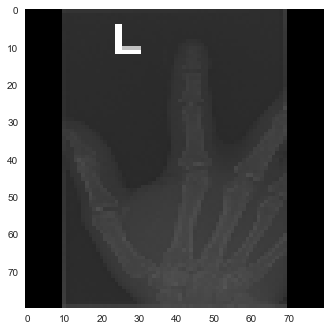

Predicted: Abnormal  [0.14420724]


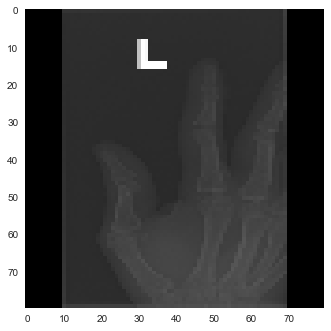

Predicted: Abnormal  [0.08381262]


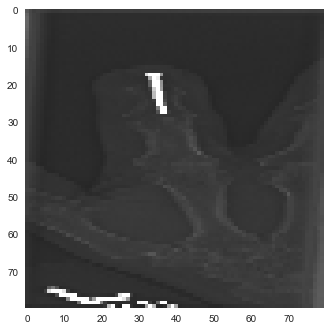

Predicted: Abnormal  [0.09778503]


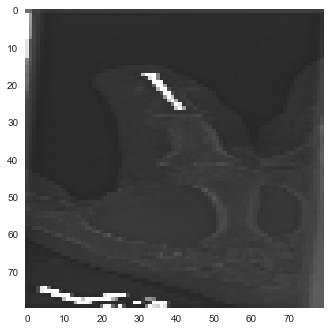

Predicted: Abnormal  [0.06999514]


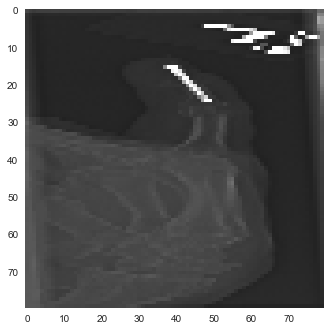

Predicted: Abnormal  [0.07285717]


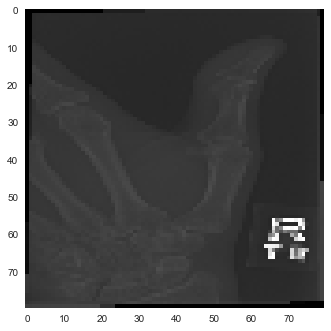

Predicted: Abnormal  [0.06131104]


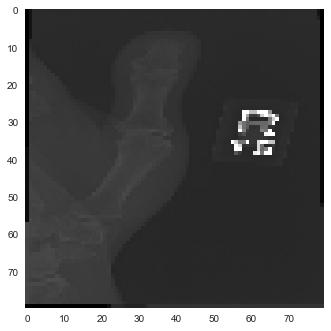

Predicted: Abnormal  [0.0964258]


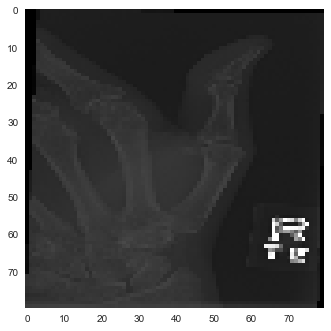

Predicted: Abnormal  [0.07668218]


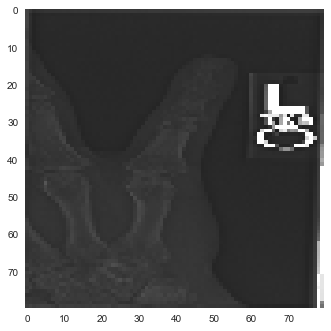

Predicted: Abnormal  [0.09988862]


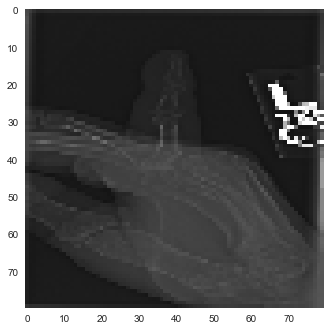

Predicted: Abnormal  [0.11382887]


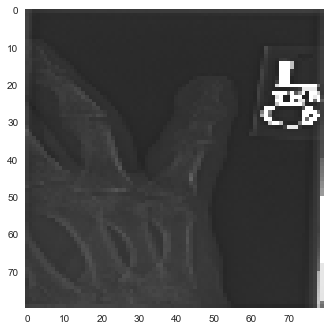

Predicted: Abnormal  [0.06905583]


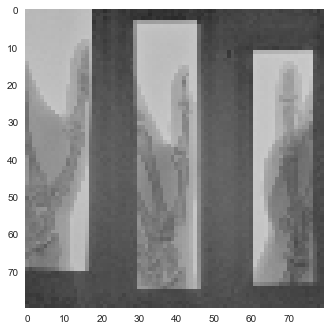

Predicted: Abnormal  [0.06881273]


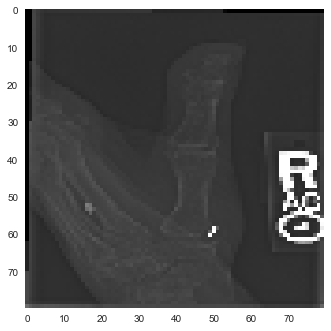

Predicted: Abnormal  [0.10395017]


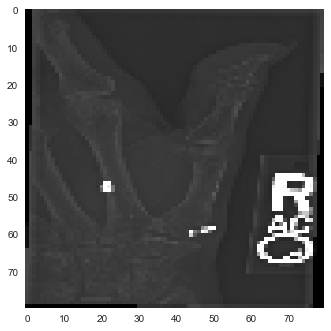

Predicted: Abnormal  [0.086521]


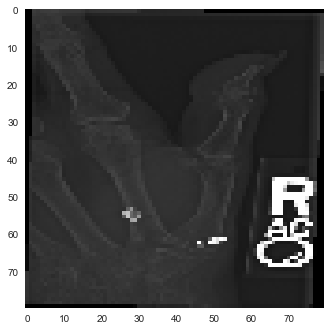

In [79]:
test_accFinger_mob,kappa_FingerMobile=plotResults(dataFinger__Test_mobile,labelsFinger_Test_mobile,modelMobile_finger)


Train on 1272 samples, validate on 288 samples
Epoch 1/20
1272/1272 [==============================] - 95s 74ms/step - loss: 6.5929 - acc: 0.5322 - val_loss: 5.7762 - val_acc: 0.4653
Epoch 2/20
1272/1272 [==============================] - 80s 63ms/step - loss: 5.4128 - acc: 0.6226 - val_loss: 5.0160 - val_acc: 0.5764
Epoch 3/20
1272/1272 [==============================] - 16s 13ms/step - loss: 4.6655 - acc: 0.6384 - val_loss: 4.3490 - val_acc: 0.5417
Epoch 4/20
1272/1272 [==============================] - 29s 22ms/step - loss: 4.0222 - acc: 0.6580 - val_loss: 3.7789 - val_acc: 0.5486
Epoch 5/20
1272/1272 [==============================] - 33s 26ms/step - loss: 3.4589 - acc: 0.6785 - val_loss: 3.3942 - val_acc: 0.5208
Epoch 6/20
1272/1272 [==============================] - 12s 10ms/step - loss: 2.9923 - acc: 0.6942 - val_loss: 2.9367 - val_acc: 0.5312
Epoch 7/20
1272/1272 [==============================] - 29s 23ms/step - loss: 2.6054 - acc: 0.7013 - val_loss: 2.5619 - val_acc: 0.5938
E

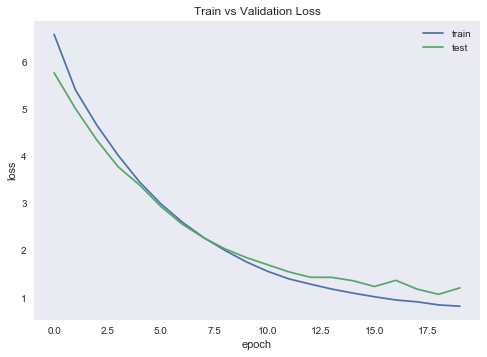

In [80]:
humerusClass='HUMERUS'
dataHumerus__Train_mobile,labelsHumrus_Train_mobile,dataHumerus__Test_mobile,labelsHumerus_Test_mobile=prepareDataMobile(humerusClass)
historyHumerus_mobile,modelHumerus_mobile=mobileNet_Model(dataHumerus__Train_mobile,labelsHumrus_Train_mobile,dataHumerus__Test_mobile,labelsHumerus_Test_mobile)
plotingModel(historyHumerus_mobile)


288/288 [==============================] - 32s 111ms/step
Loss on test set:  1.2077722681893244
Accuracy on test set:  0.5312499838570753


<Figure size 576x396 with 0 Axes>

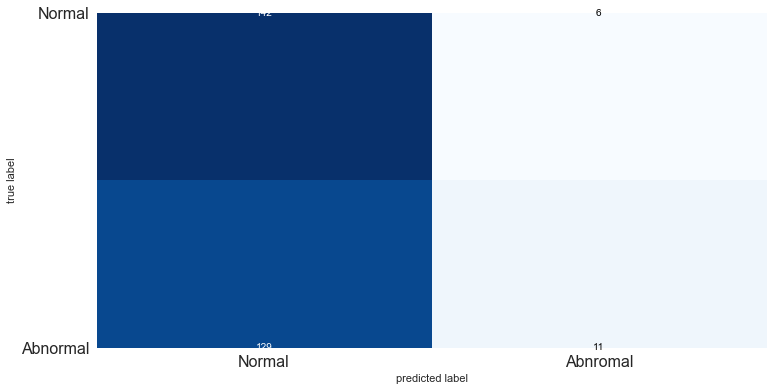

Precison of MURA for Abnormal:0.65
Recall of MURA for Abnormal:0.08
Fmeasure of MURA for Abnormal:0.14
Kappa of MURA for Abnormal:0.04
Predicted: Abnormal  [0.29014575]


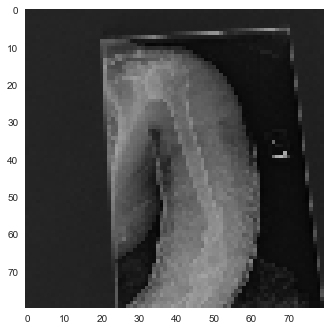

Predicted: Abnormal  [0.1966883]


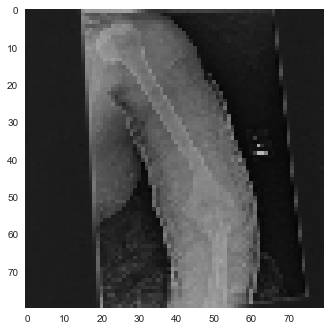

Predicted: Abnormal  [0.08005279]


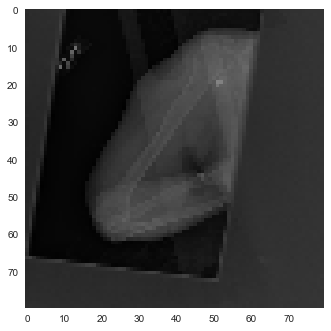

Predicted: Abnormal  [0.11538461]


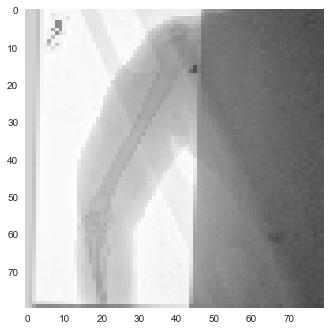

Predicted: Abnormal  [0.38585904]


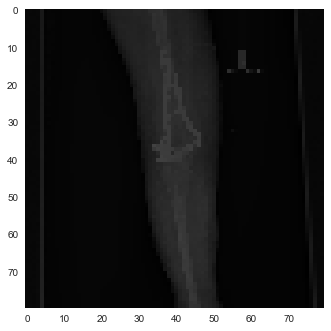

Predicted: Abnormal  [0.05910808]


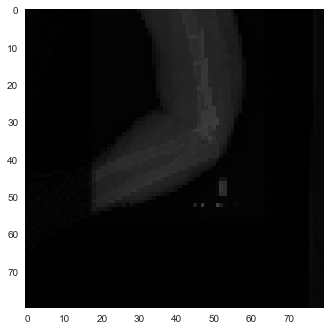

Predicted: Abnormal  [0.34855884]


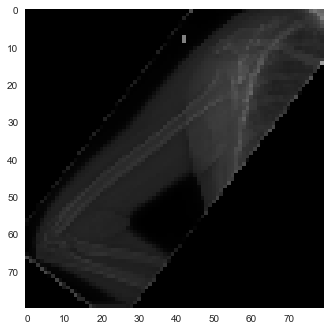

Predicted: Abnormal  [0.34279305]


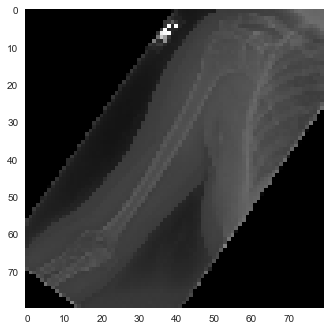

Predicted: Abnormal  [0.3358103]


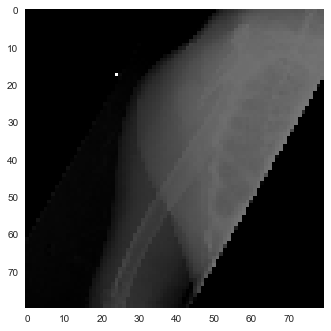

Predicted: Abnormal  [0.2399708]


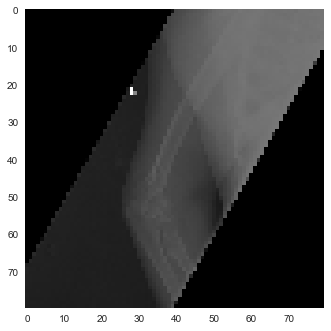

Predicted: Abnormal  [0.4404406]


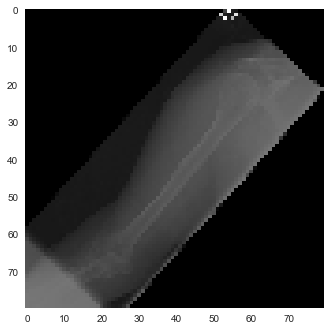

Predicted: Abnormal  [0.12705752]


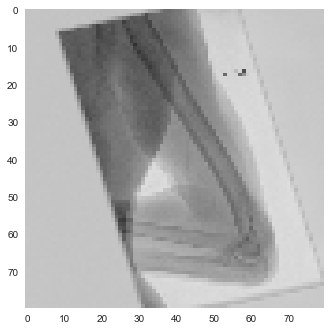

Predicted: Abnormal  [0.06761622]


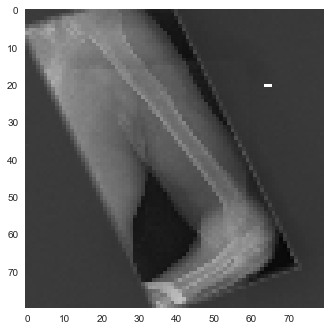

Predicted: Abnormal  [0.5030072]


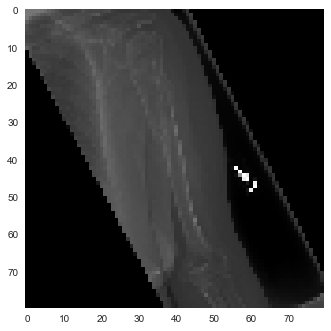

Predicted: Abnormal  [0.08152792]


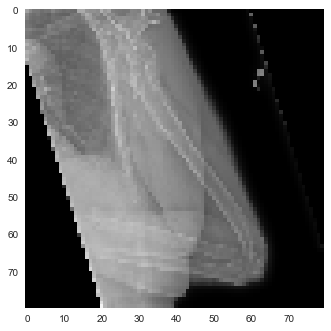

predicted: Normal [0.59705096]


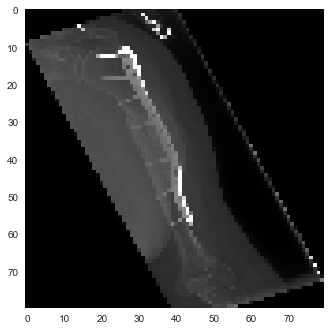

Predicted: Abnormal  [0.27459335]


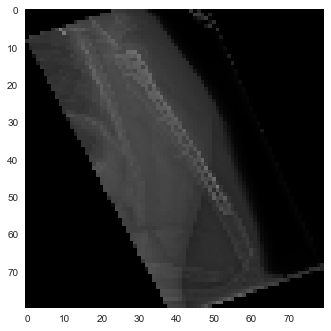

Predicted: Abnormal  [0.3005076]


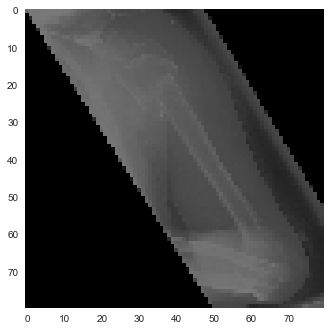

Predicted: Abnormal  [0.29962945]


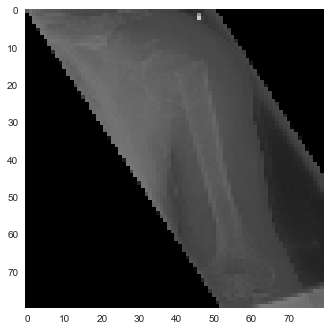

Predicted: Abnormal  [0.12023574]


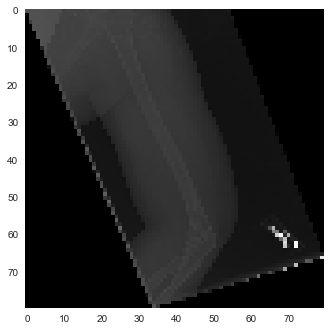

In [81]:
test_accHmerus_mob,kappa_hermusMobile=plotResults(dataHumerus__Test_mobile,labelsHumerus_Test_mobile,modelHumerus_mobile)

Train on 8379 samples, validate on 563 samples
Epoch 1/20
8379/8379 [==============================] - 257s 31ms/step - loss: 4.6536 - acc: 0.5538 - val_loss: 2.8933 - val_acc: 0.5169
Epoch 2/20
8379/8379 [==============================] - 170s 20ms/step - loss: 2.0150 - acc: 0.5973 - val_loss: 1.4404 - val_acc: 0.5542
Epoch 3/20
8379/8379 [==============================] - 174s 21ms/step - loss: 1.1272 - acc: 0.6291 - val_loss: 0.9973 - val_acc: 0.5027
Epoch 4/20
8379/8379 [==============================] - 179s 21ms/step - loss: 0.8414 - acc: 0.6416 - val_loss: 0.8375 - val_acc: 0.5400
Epoch 5/20
8379/8379 [==============================] - 190s 23ms/step - loss: 0.7471 - acc: 0.6441 - val_loss: 0.7875 - val_acc: 0.5169
Epoch 6/20
8379/8379 [==============================] - 189s 23ms/step - loss: 0.7120 - acc: 0.6454 - val_loss: 0.7707 - val_acc: 0.5382
Epoch 7/20
8379/8379 [==============================] - 137s 16ms/step - loss: 0.6976 - acc: 0.6521 - val_loss: 0.7725 - val_acc: 0

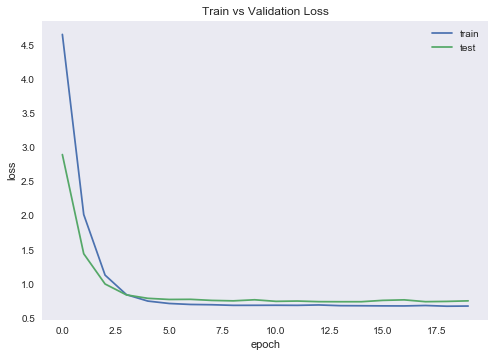

In [85]:
shoulderClass='SHOULDER'
dataShoulder__Train_mobile,labelsShoulder_Train_mobile,dataShoulder__Test_mobile,labelsShoulder_Test_mobile=prepareDataMobile(shoulderClass)
historyShoulder_mobile,modelShoulder_mobile=mobileNet_Model(dataShoulder__Train_mobile,labelsShoulder_Train_mobile,dataShoulder__Test_mobile,labelsShoulder_Test_mobile)
plotingModel(historyShoulder_mobile)


563/563 [==============================] - 59s 106ms/step
Loss on test set:  0.7503782229144027
Accuracy on test set:  0.5133214953420006


<Figure size 576x396 with 0 Axes>

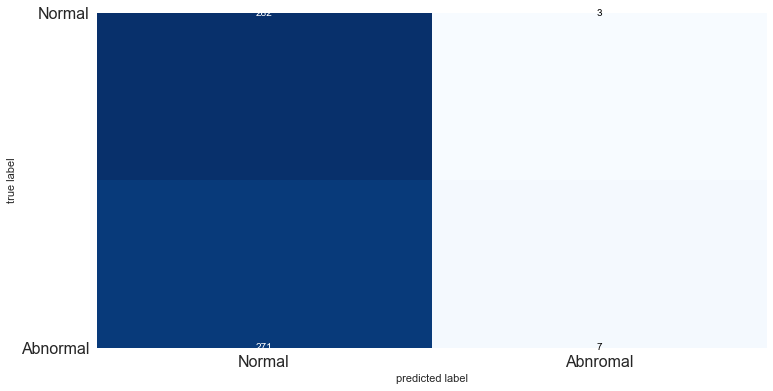

Precison of MURA for Abnormal:0.70
Recall of MURA for Abnormal:0.03
Fmeasure of MURA for Abnormal:0.05
Kappa of MURA for Abnormal:0.01
Predicted: Abnormal  [0.45488507]


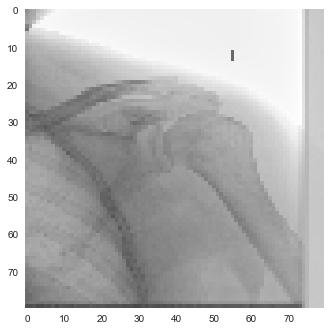

Predicted: Abnormal  [0.45933992]


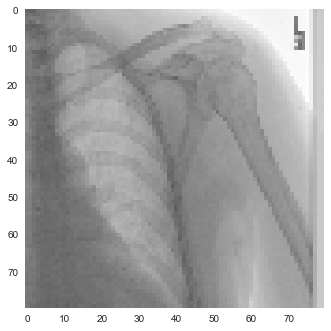

Predicted: Abnormal  [0.37392312]


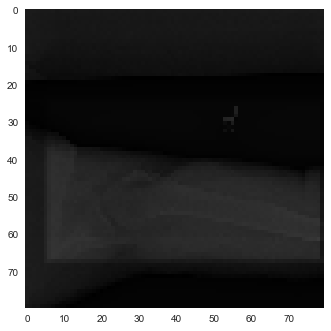

Predicted: Abnormal  [0.33834898]


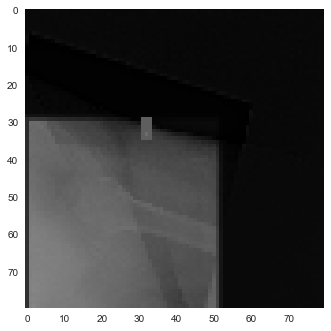

Predicted: Abnormal  [0.3549866]


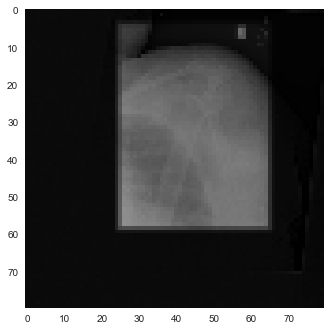

Predicted: Abnormal  [0.3843633]


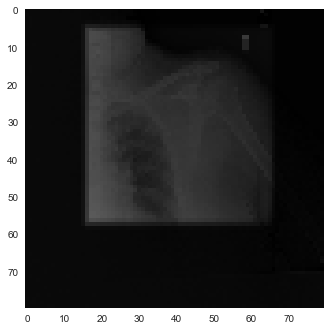

Predicted: Abnormal  [0.36967945]


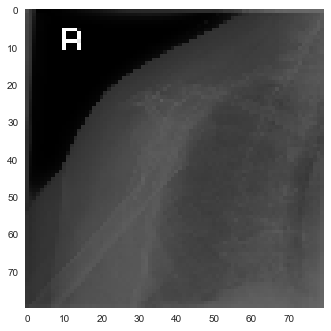

Predicted: Abnormal  [0.40254802]


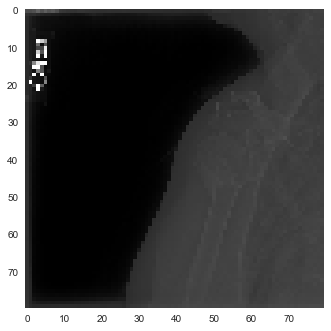

Predicted: Abnormal  [0.34030432]


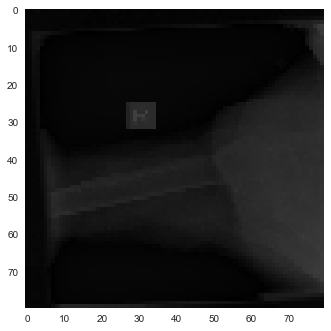

Predicted: Abnormal  [0.40521672]


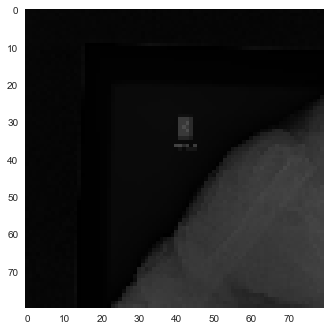

Predicted: Abnormal  [0.4365161]


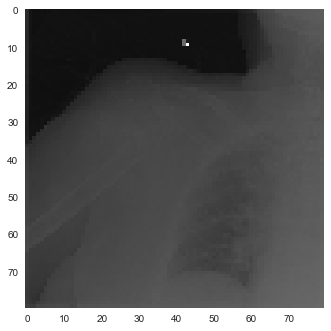

Predicted: Abnormal  [0.36649662]


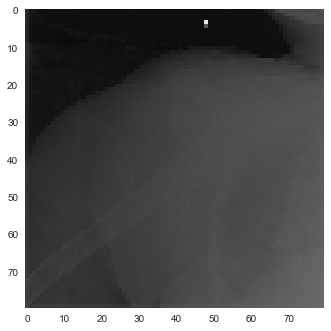

Predicted: Abnormal  [0.350116]


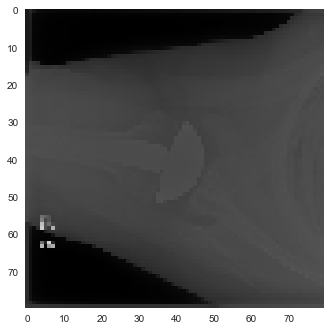

Predicted: Abnormal  [0.37391844]


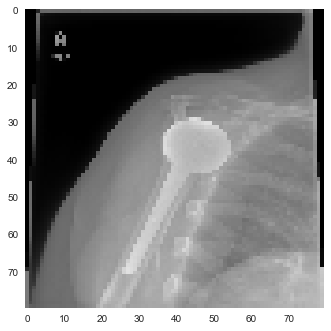

Predicted: Abnormal  [0.35453308]


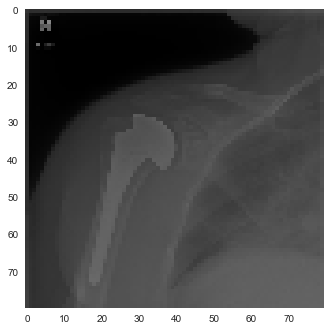

Predicted: Abnormal  [0.45399567]


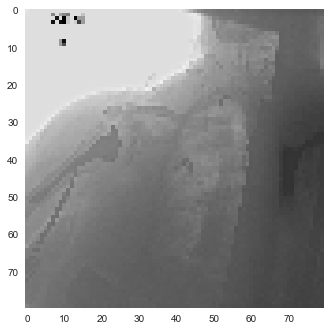

Predicted: Abnormal  [0.4097178]


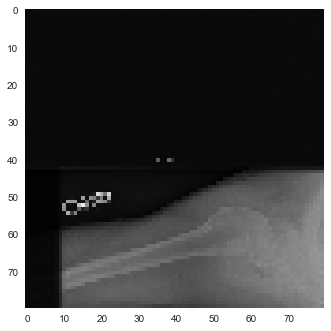

Predicted: Abnormal  [0.4469406]


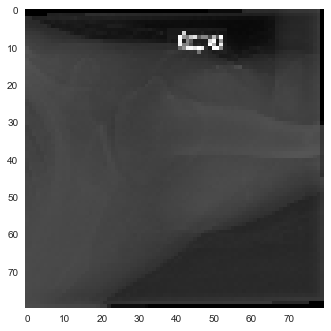

Predicted: Abnormal  [0.3873769]


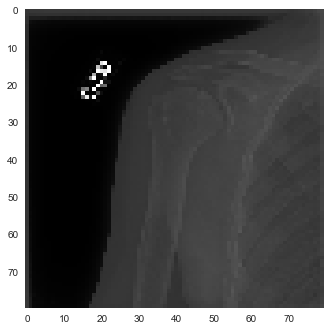

Predicted: Abnormal  [0.36496598]


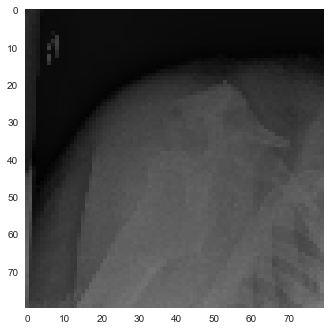

In [88]:
test_accShoulder_mob,kappa_shoulderMobile=plotResults(dataShoulder__Test_mobile,labelsShoulder_Test_mobile,modelShoulder_mobile)

Train on 5543 samples, validate on 460 samples
Epoch 1/20
5543/5543 [==============================] - 390s 70ms/step - loss: 4.9752 - acc: 0.6679 - val_loss: 3.5548 - val_acc: 0.5891
Epoch 2/20
5543/5543 [==============================] - 92s 17ms/step - loss: 2.5833 - acc: 0.7150 - val_loss: 2.0401 - val_acc: 0.5891
Epoch 3/20
5543/5543 [==============================] - 60s 11ms/step - loss: 1.4936 - acc: 0.7247 - val_loss: 1.5582 - val_acc: 0.5891
Epoch 4/20
5543/5543 [==============================] - 84s 15ms/step - loss: 1.0155 - acc: 0.7343 - val_loss: 1.0821 - val_acc: 0.5891
Epoch 5/20
5543/5543 [==============================] - 58s 10ms/step - loss: 0.7883 - acc: 0.7355 - val_loss: 0.9930 - val_acc: 0.5891
Epoch 6/20
5543/5543 [==============================] - 39s 7ms/step - loss: 0.6986 - acc: 0.7377 - val_loss: 0.9121 - val_acc: 0.5891
Epoch 7/20
5543/5543 [==============================] - 43s 8ms/step - loss: 0.6575 - acc: 0.7413 - val_loss: 0.9344 - val_acc: 0.5891
Ep

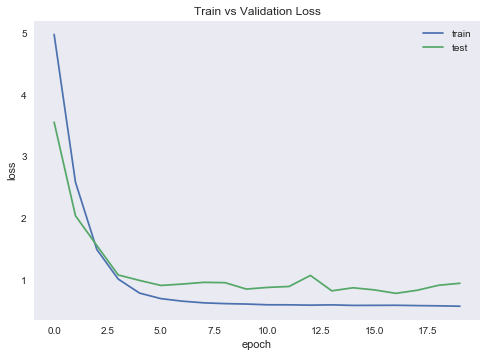

In [90]:
handClass='HAND'
dataHAND__Train_mobile,labelsHAND_Train_mobile,dataHAND__Test_mobile,labelsHAND_Test_mobile=prepareDataMobile(handClass)
historyHand_mobile,modelHand_mobile=mobileNet_Model(dataHAND__Train_mobile,labelsHAND_Train_mobile,dataHAND__Test_mobile,labelsHAND_Test_mobile)
plotingModel(historyHand_mobile)


460/460 [==============================] - 14s 31ms/step
Loss on test set:  0.9472940628943236
Accuracy on test set:  0.5891304314136505


<Figure size 576x396 with 0 Axes>

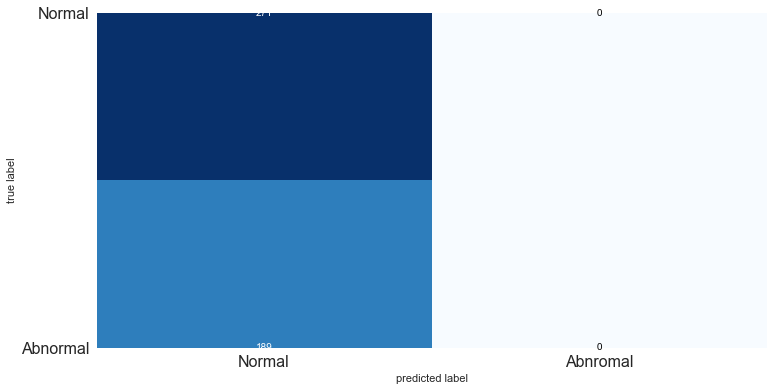

Precison of MURA for Abnormal:nan
Recall of MURA for Abnormal:0.00
Fmeasure of MURA for Abnormal:nan
Kappa of MURA for Abnormal:0.00
Predicted: Abnormal  [0.16342005]


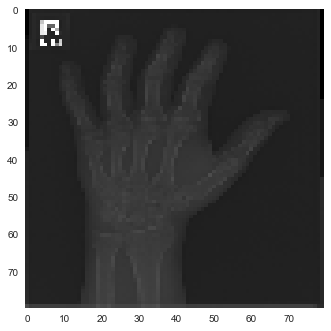

Predicted: Abnormal  [0.14310575]


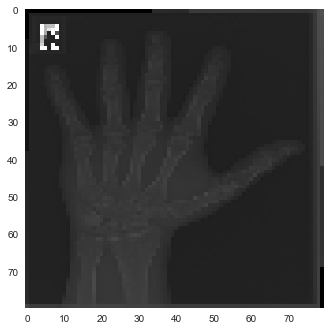

Predicted: Abnormal  [0.17628354]


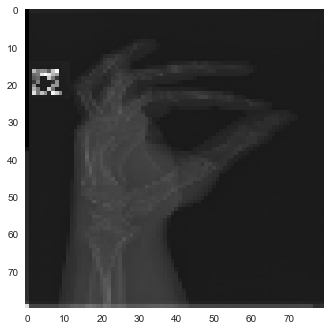

Predicted: Abnormal  [0.1090031]


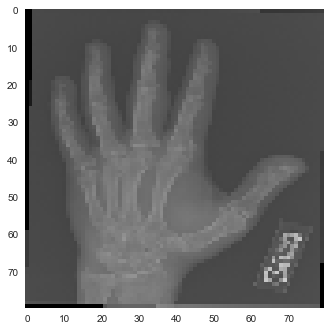

Predicted: Abnormal  [0.12956682]


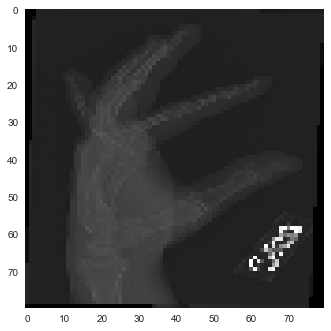

Predicted: Abnormal  [0.14282888]


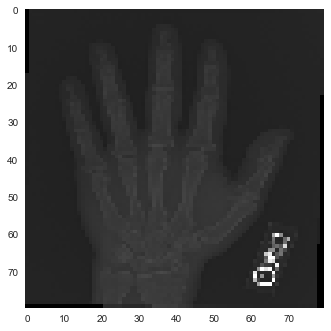

Predicted: Abnormal  [0.14570984]


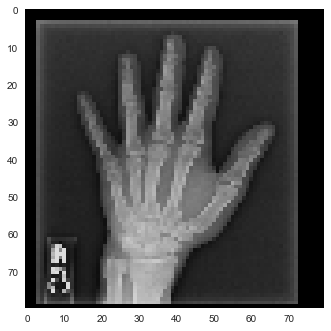

Predicted: Abnormal  [0.17822132]


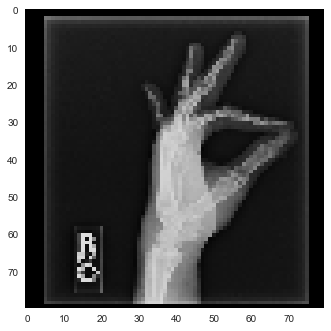

Predicted: Abnormal  [0.20018506]


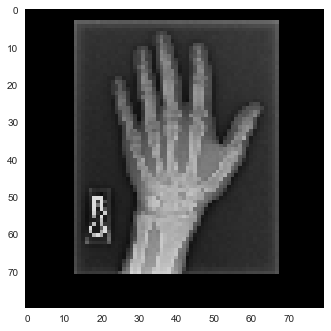

Predicted: Abnormal  [0.14456353]


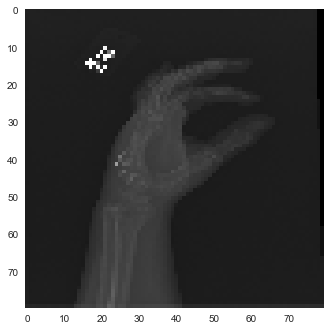

Predicted: Abnormal  [0.10791525]


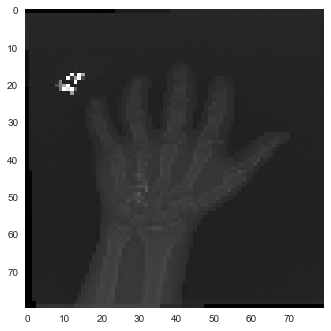

Predicted: Abnormal  [0.10512358]


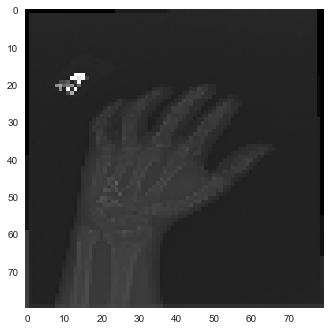

Predicted: Abnormal  [0.17309675]


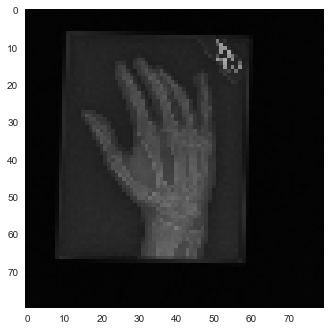

Predicted: Abnormal  [0.11266086]


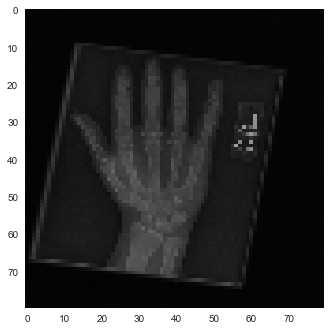

Predicted: Abnormal  [0.1796425]


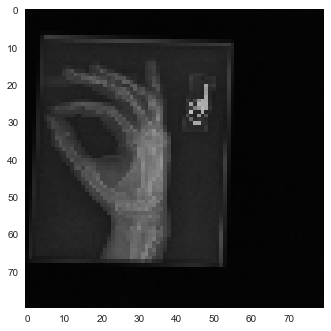

Predicted: Abnormal  [0.09722719]


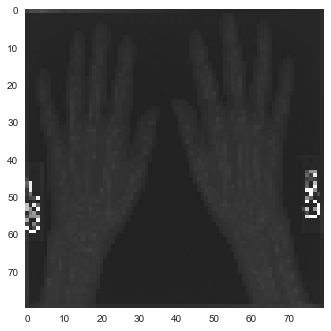

Predicted: Abnormal  [0.12830803]


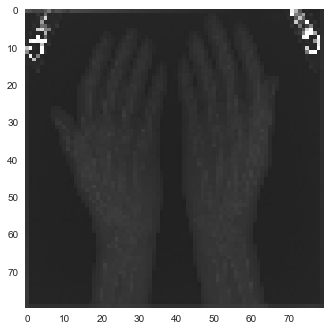

Predicted: Abnormal  [0.10436437]


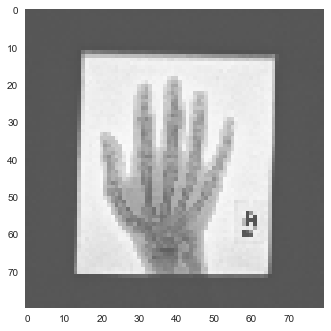

Predicted: Abnormal  [0.09703615]


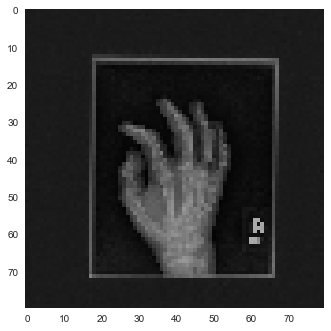

Predicted: Abnormal  [0.11477852]


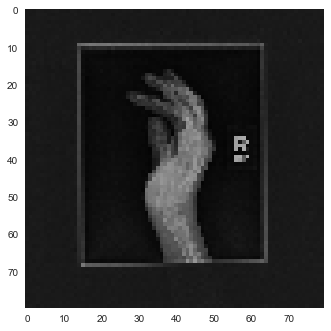

In [91]:
test_accHand_mob,kappa_handMobile=plotResults(dataHAND__Test_mobile,labelsHAND_Test_mobile,modelHand_mobile)

Train on 9752 samples, validate on 659 samples
Epoch 1/20
9752/9752 [==============================] - 99s 10ms/step - loss: 4.3142 - acc: 0.5990 - val_loss: 2.5028 - val_acc: 0.5524
Epoch 2/20
9752/9752 [==============================] - 59s 6ms/step - loss: 1.6418 - acc: 0.6577 - val_loss: 1.2494 - val_acc: 0.5478
Epoch 3/20
9752/9752 [==============================] - 59s 6ms/step - loss: 0.9314 - acc: 0.6798 - val_loss: 1.0073 - val_acc: 0.5524
Epoch 4/20
9752/9752 [==============================] - 57s 6ms/step - loss: 0.7463 - acc: 0.6846 - val_loss: 0.8427 - val_acc: 0.5296
Epoch 5/20
9752/9752 [==============================] - 59s 6ms/step - loss: 0.6908 - acc: 0.6853 - val_loss: 0.8658 - val_acc: 0.5524
Epoch 6/20
9752/9752 [==============================] - 59s 6ms/step - loss: 0.6688 - acc: 0.6871 - val_loss: 0.8221 - val_acc: 0.5539
Epoch 7/20
9752/9752 [==============================] - 58s 6ms/step - loss: 0.6646 - acc: 0.6800 - val_loss: 0.8082 - val_acc: 0.5478
Epoch 8

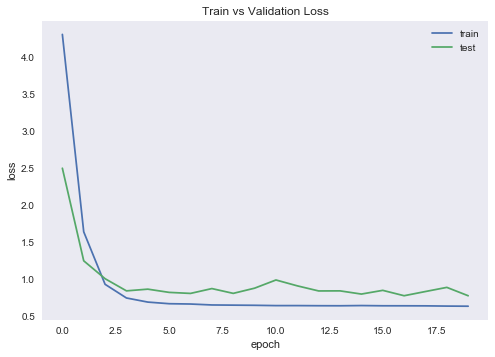

In [92]:
wristClass='WRIST'
dataWRIST__Train_mobile,labelsWRIST_Train_mobile,dataWRIST__Test_mobile,labelsWRIST_Test_mobile=prepareDataMobile(wristClass)
historyWrist_mobile,modelWrist_mobile=mobileNet_Model(dataWRIST__Train_mobile,labelsWRIST_Train_mobile,dataWRIST__Test_mobile,labelsWRIST_Test_mobile)
plotingModel(historyWrist_mobile)


659/659 [==============================] - 38s 57ms/step
Loss on test set:  0.7764790190188765
Accuracy on test set:  0.5508345854390916


<Figure size 576x396 with 0 Axes>

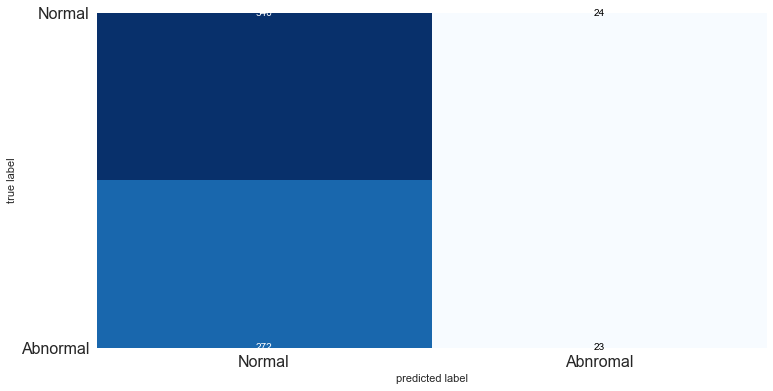

Precison of MURA for Abnormal:0.49
Recall of MURA for Abnormal:0.08
Fmeasure of MURA for Abnormal:0.13
Kappa of MURA for Abnormal:0.01
Predicted: Abnormal  [0.4068926]


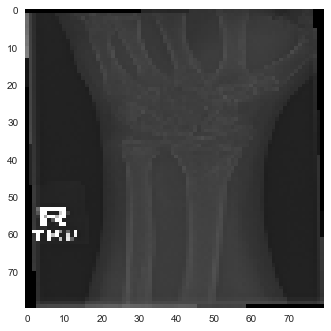

Predicted: Abnormal  [0.4113531]


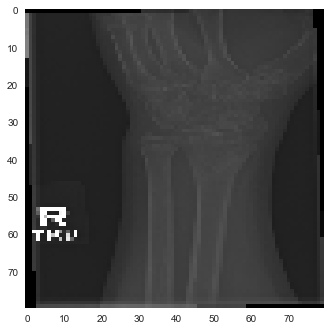

Predicted: Abnormal  [0.3838544]


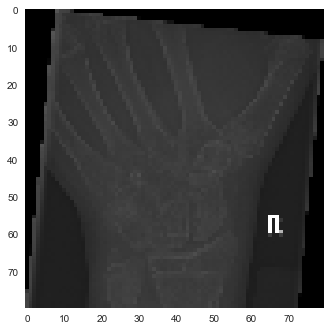

Predicted: Abnormal  [0.2943319]


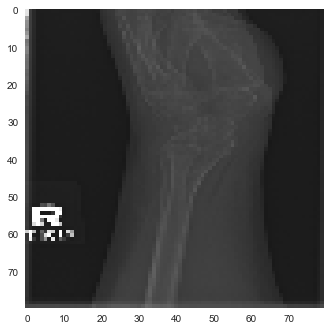

predicted: Normal [0.62462103]


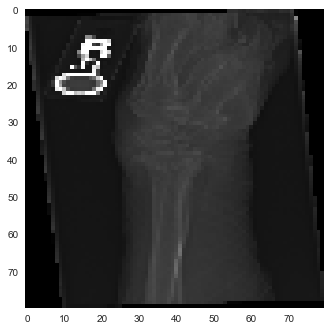

Predicted: Abnormal  [0.46821883]


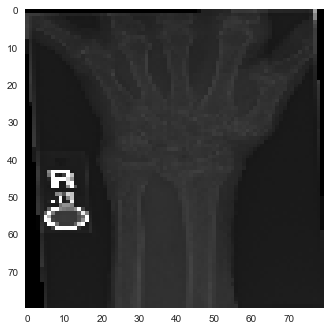

Predicted: Abnormal  [0.27601027]


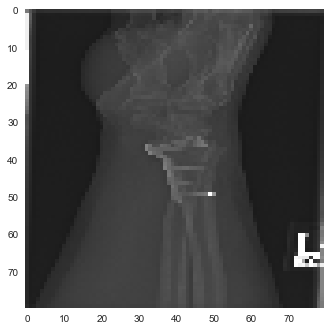

Predicted: Abnormal  [0.28030115]


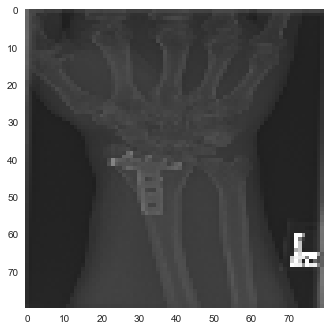

Predicted: Abnormal  [0.31731725]


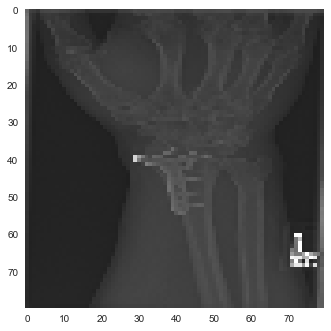

Predicted: Abnormal  [0.41084373]


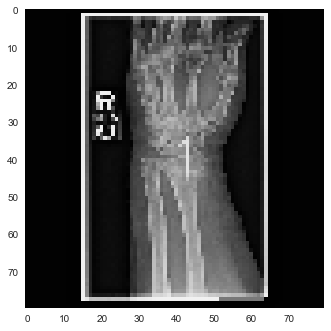

Predicted: Abnormal  [0.46737248]


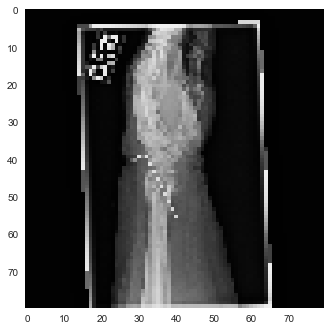

Predicted: Abnormal  [0.37602738]


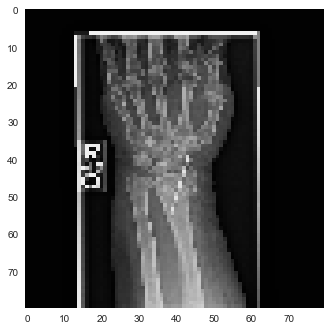

Predicted: Abnormal  [0.3624766]


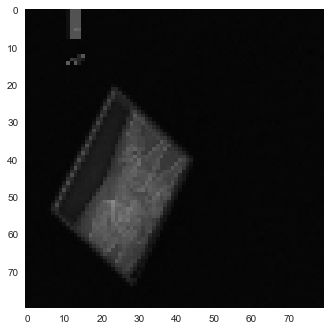

predicted: Normal [0.57733166]


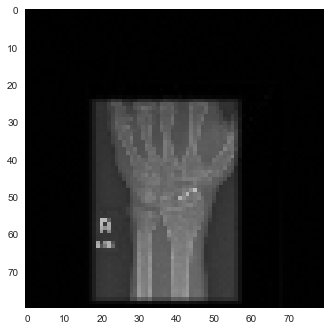

Predicted: Abnormal  [0.41532466]


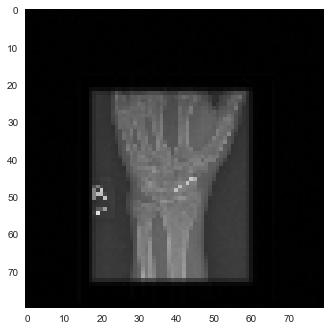

Predicted: Abnormal  [0.37878308]


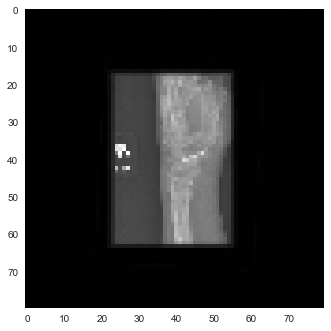

Predicted: Abnormal  [0.315466]


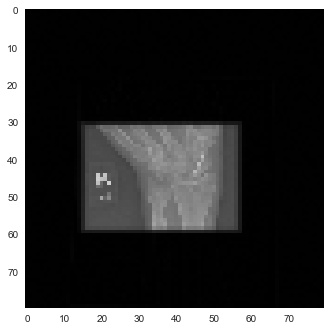

Predicted: Abnormal  [0.3630681]


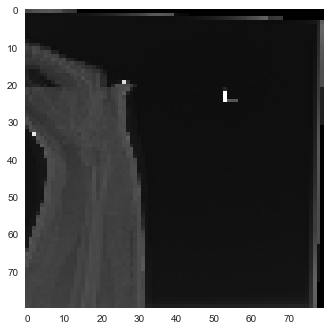

Predicted: Abnormal  [0.468469]


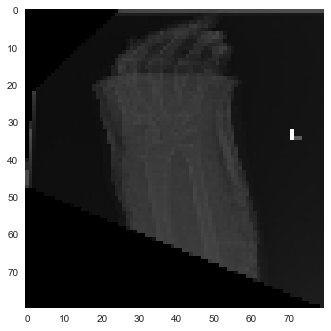

Predicted: Abnormal  [0.27133667]


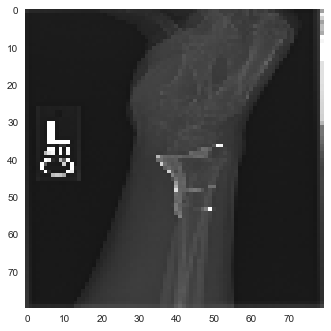

In [93]:
test_accWrist_mob,kappa_wristMobile=plotResults(dataWRIST__Test_mobile,labelsWRIST_Test_mobile,modelWrist_mobile)

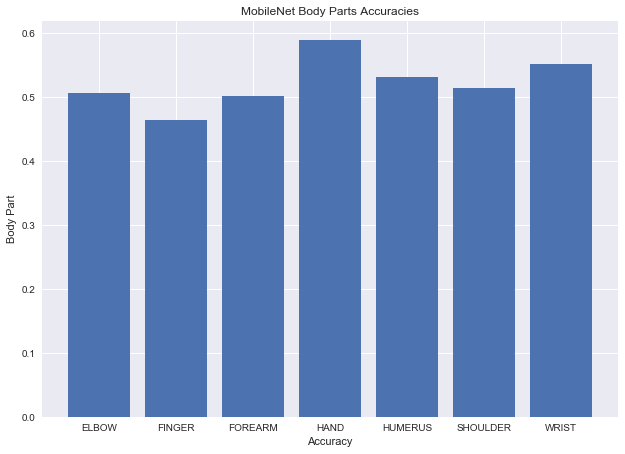

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bodyPart = ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
test_acc = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]
ax.bar(bodyPart,test_acc)
plt.title("MobileNet Body Parts Accuracies")
plt.ylabel('Body Part')
plt.xlabel('Accuracy')

plt.show()

$Save in CSV File$

In [100]:
test_acc = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]


In [103]:
import numpy
numpy.savetxt("MobileNet_accuracy.csv", test_acc, delimiter=",",header='MobileNet ')
